In [1]:
#import libraries
import os
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans


default_log_name='data_validation.log'
onboarded_dir='../../data/processed/'
onboarded_file='Merged_dataset.csv'
le = LabelEncoder()

In [2]:
# read dataset
df = pd.read_csv(os.path.join(onboarded_dir, onboarded_file))
df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_8140\342745817.py:2: DtypeWarning: Columns (1,3,9,10,11,16,18,19,23,24,25,26,42,56,57,58,61,62,63,64,65,66,75,76,77,78,113,123,124,127,185,188,189,192,195,197,198,201,204,210,213,217,225,234,238,240,243,247,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(onboarded_dir, onboarded_file))


(11448, 314)

## Describe Dataset

In [3]:
df.head()

,Subject,Screening Number,Age,BMI,Ethnicity_1,Gender,Sequence,Tx,Visit,Time,...,PAA3OH,PAA4OH,PAAOCH,PPA3OCH4Oglc,PPA4OCH3Oglc,PPA4OH,PPAdiOH,PPAOCH,Unnamed: 9,Unnamed: 10
0,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Columns: 314 entries, Subject to Unnamed: 10
dtypes: float64(257), object(57)
memory usage: 27.4+ MB


### Filter dataset by category
#### Working with AVOC dataset

In [5]:
'''Code snippet by Mike (changed)'''
def filter_dataset(data,filter_name):
    filtered_data = data[data.iloc[:, 0].fillna("").astype(str).str.startswith(filter_name)]  # Filter based on the first column  
    return filtered_data
    
# Example usage
filter_name = "AVOC1"  # Replace with dataset name
filtered_df = filter_dataset(df,filter_name)   # df is the dataframe or csv we loaded

filtered_df.head()

,Subject,Screening Number,Age,BMI,Ethnicity_1,Gender,Sequence,Tx,Visit,Time,...,PAA3OH,PAA4OH,PAAOCH,PPA3OCH4Oglc,PPA4OCH3Oglc,PPA4OH,PPAdiOH,PPAOCH,Unnamed: 9,Unnamed: 10
96,AVOC1_24101,NaN,43.0,29.8,AA,F,CBA,C,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,AVOC1_24101,NaN,43.0,29.8,AA,F,CBA,C,1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,AVOC1_24101,NaN,43.0,29.8,AA,F,CBA,C,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,AVOC1_24101,NaN,43.0,29.8,AA,F,CBA,C,1,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,AVOC1_24101,NaN,43.0,29.8,AA,F,CBA,A,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
filtered_df.shape

(2543, 314)

In [7]:
filtered_df.isnull().sum()

Subject                0
Screening Number    2543
Age                    0
BMI                    0
Ethnicity_1            0
                    ... 
PPA4OH              2543
PPAdiOH             2543
PPAOCH              2543
Unnamed: 9          2543
Unnamed: 10         2543
Length: 314, dtype: int64

### Remove Nulls

In [8]:

def drop_columns_if_all_null(df,threshold=0.8):

    # Calculate the percentage of null values in each column
    null_percentages = df.isnull().mean()
    # Get the column names where the null percentage exceeds the threshold
    columns_to_drop = null_percentages[null_percentages >= threshold].index
    # Drop the columns from the DataFrame
    df_cleaned = df.drop(columns=columns_to_drop)

    # # Drop columns where all values are null
    # df_cleaned = df.dropna(axis=1, how='all')

    # drop cols where all zero
    zero_columns = df_cleaned.columns[(df_cleaned == 0).all()]
    df_cleaned.drop(zero_columns, axis=1, inplace=True)

    return df_cleaned

# Drop columns with all null values
df_cleaned = drop_columns_if_all_null(filtered_df,threshold=0.8)
print(df_cleaned.shape)

(2543, 21)


In [9]:
df_cleaned.describe()

,Age,Time1,TG,b_TG,Glc,b_Glc,Insulin,b_Ins
count,2543.000000,2263.000000,1002.000000,1002.000000,1002.000000,1002.000000,1034.000000,1002.000000
mean,37.920959,157.397260,126.241158,111.259671,105.047525,103.645888,20.633888,6.881557
std,10.183353,125.627989,126.261792,141.687610,21.294509,10.933560,22.122104,4.842777
min,25.000000,0.000000,27.980000,27.980000,58.970000,88.720000,1.090000,1.160000
25%,28.000000,30.000000,70.350000,62.810000,95.045000,98.112500,5.200000,3.607500
50%,38.000000,120.000000,93.650000,73.580000,102.255000,102.610000,11.110000,5.880000
75%,44.000000,240.000000,131.560000,97.120000,110.090000,106.500000,29.930000,7.800000
max,58.000000,360.000000,1245.800000,1054.710000,237.680000,166.410000,141.180000,31.450000


### Label encode some columns

In [10]:
# function to check unique values in each column and label encode them
def check_unique_values(df):
    for col in df.columns:
        if df[col].nunique() < 10:
            df[col] = le.fit_transform(df[col])

    return df

filtered_df_null_encoded = check_unique_values(df_cleaned)

In [11]:
filtered_df_null_encoded.head()

,Subject,Age,BMI,Ethnicity_1,Gender,Sequence,Tx,Visit,Time,BMICat,...,Time1,TG,b_TG,Glc,b_Glc,Insulin,b_Ins,TX,TX_Actual,Tx_Actual
96,AVOC1_24101,43.0,29.8,1,0,5,2,0,0.0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
97,AVOC1_24101,43.0,29.8,1,0,5,2,0,2.0,1,...,3,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
98,AVOC1_24101,43.0,29.8,1,0,5,2,0,4.0,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
99,AVOC1_24101,43.0,29.8,1,0,5,2,0,6.0,1,...,7,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
100,AVOC1_24101,43.0,29.8,1,0,5,0,2,0.0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3


### Drop some columns

In [12]:
# norm_df = filtered_df_null_encoded.drop(['Subject','Time','ScreenDate','consent date ','ScreenID'], axis=1)
norm_df = filtered_df_null_encoded.drop(['Subject','Time'], axis=1)
norm_df.shape

(2543, 19)

### imputations

In [13]:
# for cols in norm_df.columns:
#     print(cols,norm_df[cols].isnull().sum())

''' need to handle Nulls
TG 1541
b_TG 1541
Glc 1541
b_Glc 1541
Insulin 1509
b_Ins 1541'''

' need to handle Nulls\nTG 1541\nb_TG 1541\nGlc 1541\nb_Glc 1541\nInsulin 1509\nb_Ins 1541'

### Normalize

In [14]:
def normalize_numeric_columns(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Normalize numeric columns
    df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
    
    return df

normalized_df = normalize_numeric_columns(norm_df)


In [15]:
normalized_df.shape

(2543, 19)

In [16]:
normalized_df.head()

,Age,BMI,Ethnicity_1,Gender,Sequence,Tx,Visit,BMICat,TX2,Time1,TG,b_TG,Glc,b_Glc,Insulin,b_Ins,TX,TX_Actual,Tx_Actual
96,0.545455,29.8,1,0,5,2,0,1,1,0.000,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
97,0.545455,29.8,1,0,5,2,0,1,1,0.375,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
98,0.545455,29.8,1,0,5,2,0,1,1,0.625,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
99,0.545455,29.8,1,0,5,2,0,1,1,0.875,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
100,0.545455,29.8,1,0,5,0,2,1,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3


## Correlation matrix

C:\Users\User\AppData\Local\Temp\ipykernel_8140\3567470366.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = normalized_df.corr()


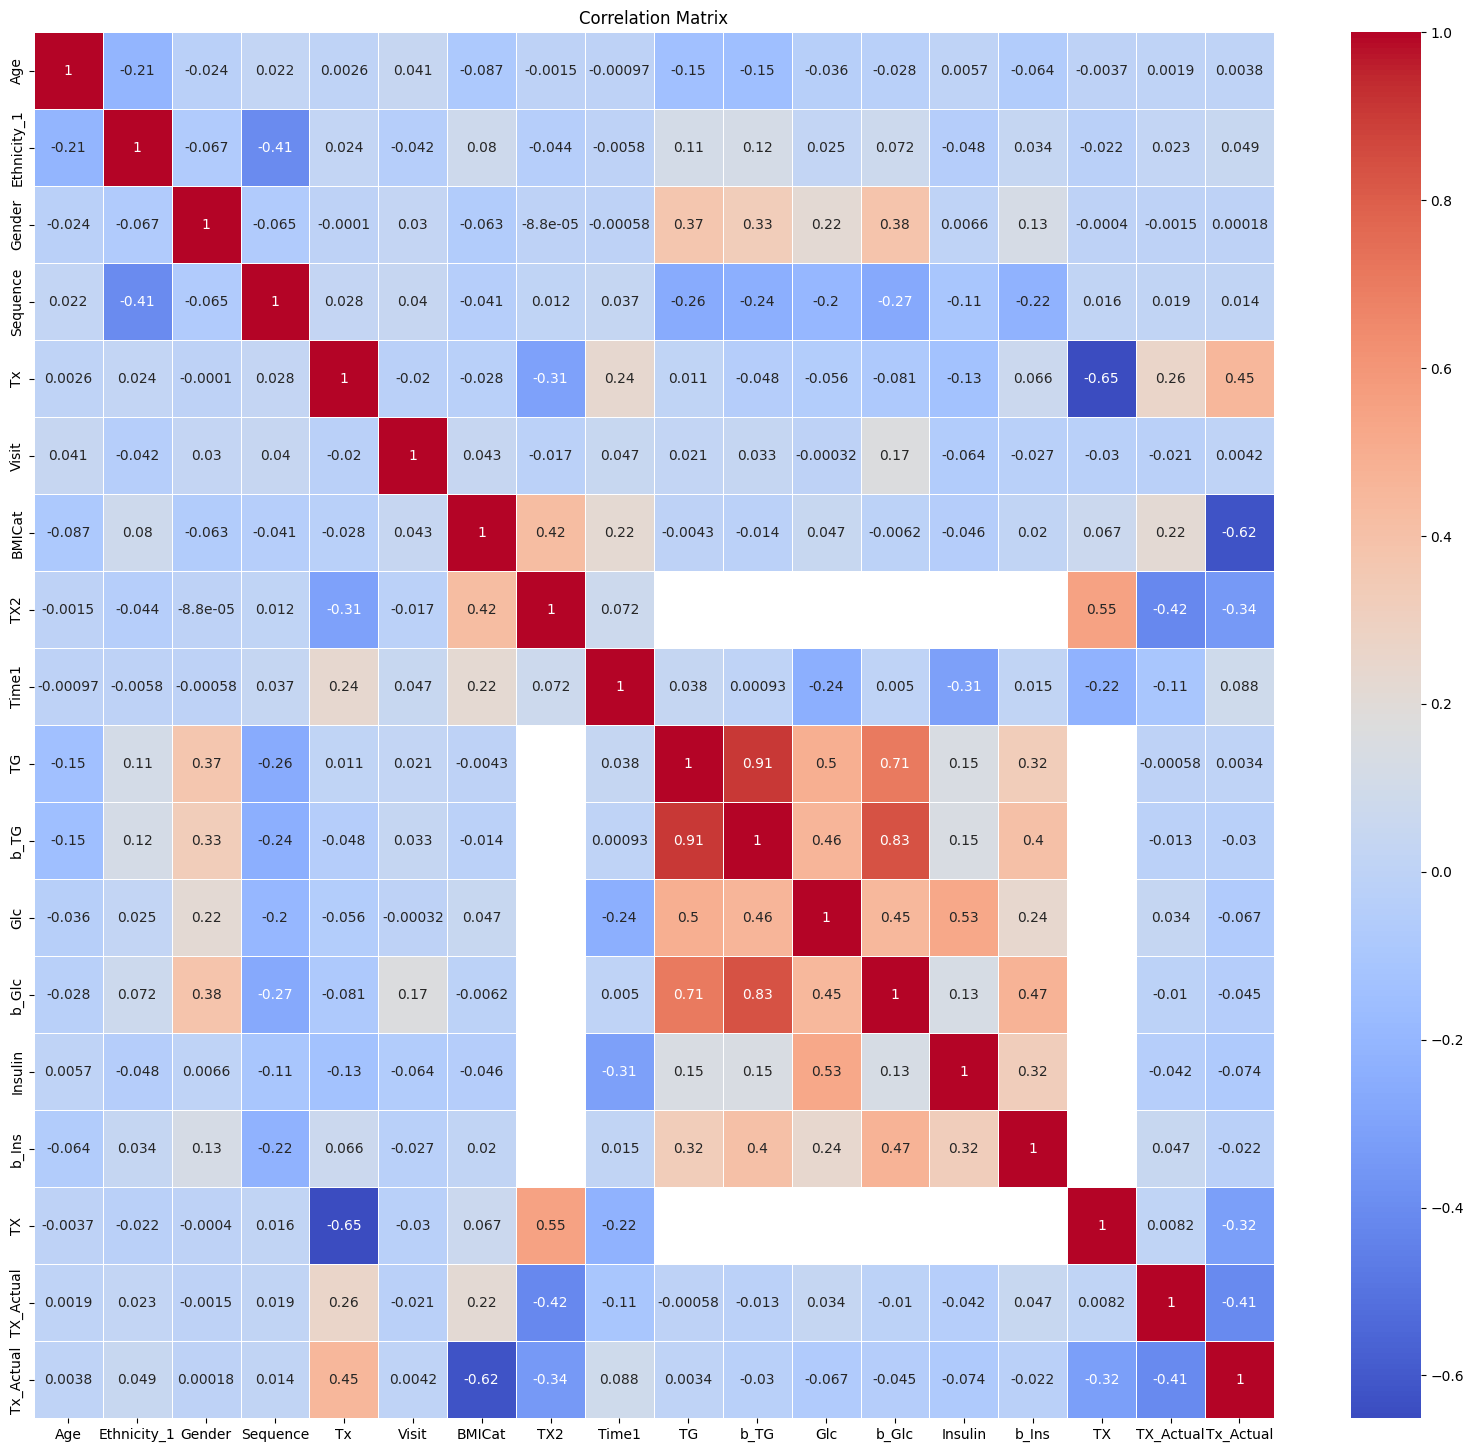

In [17]:
# function to calculate correlation matrix and plot it
def visualize_correlation_matrix(correlation_matrix):
    # Create a heatmap using seaborn
    plt.figure(figsize=(20, 18))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

# Calculate correlation matrix
correlation_matrix = normalized_df.corr()
# visualize
visualize_correlation_matrix(correlation_matrix)


### identify strong correlations

In [18]:
def identify_strong_correlations(correlation_matrix, threshold=0.7):
    # Find the indices of strongly correlated features
    n_features = correlation_matrix.shape[0]
    strongly_correlated = []
    
    for i in range(n_features):
        for j in range(i+1, n_features):
            if abs(correlation_matrix.iloc[i, j]) >= threshold:
                strongly_correlated.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
    
    return strongly_correlated

# Set a correlation threshold
threshold = 0.7

# Find strongly correlated features
strong_correlations = identify_strong_correlations(correlation_matrix, threshold)
strong_correlations_df = pd.DataFrame(strong_correlations, columns=['feature1','feature2','correlation'])
strong_correlations_df


,feature1,feature2,correlation
0,TG,b_TG,0.905658
1,TG,b_Glc,0.707989
2,b_TG,b_Glc,0.833130


### Perform Spearman correlations

C:\Users\User\AppData\Local\Temp\ipykernel_8140\3496157518.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr_matrix = df.corr(method='spearman')


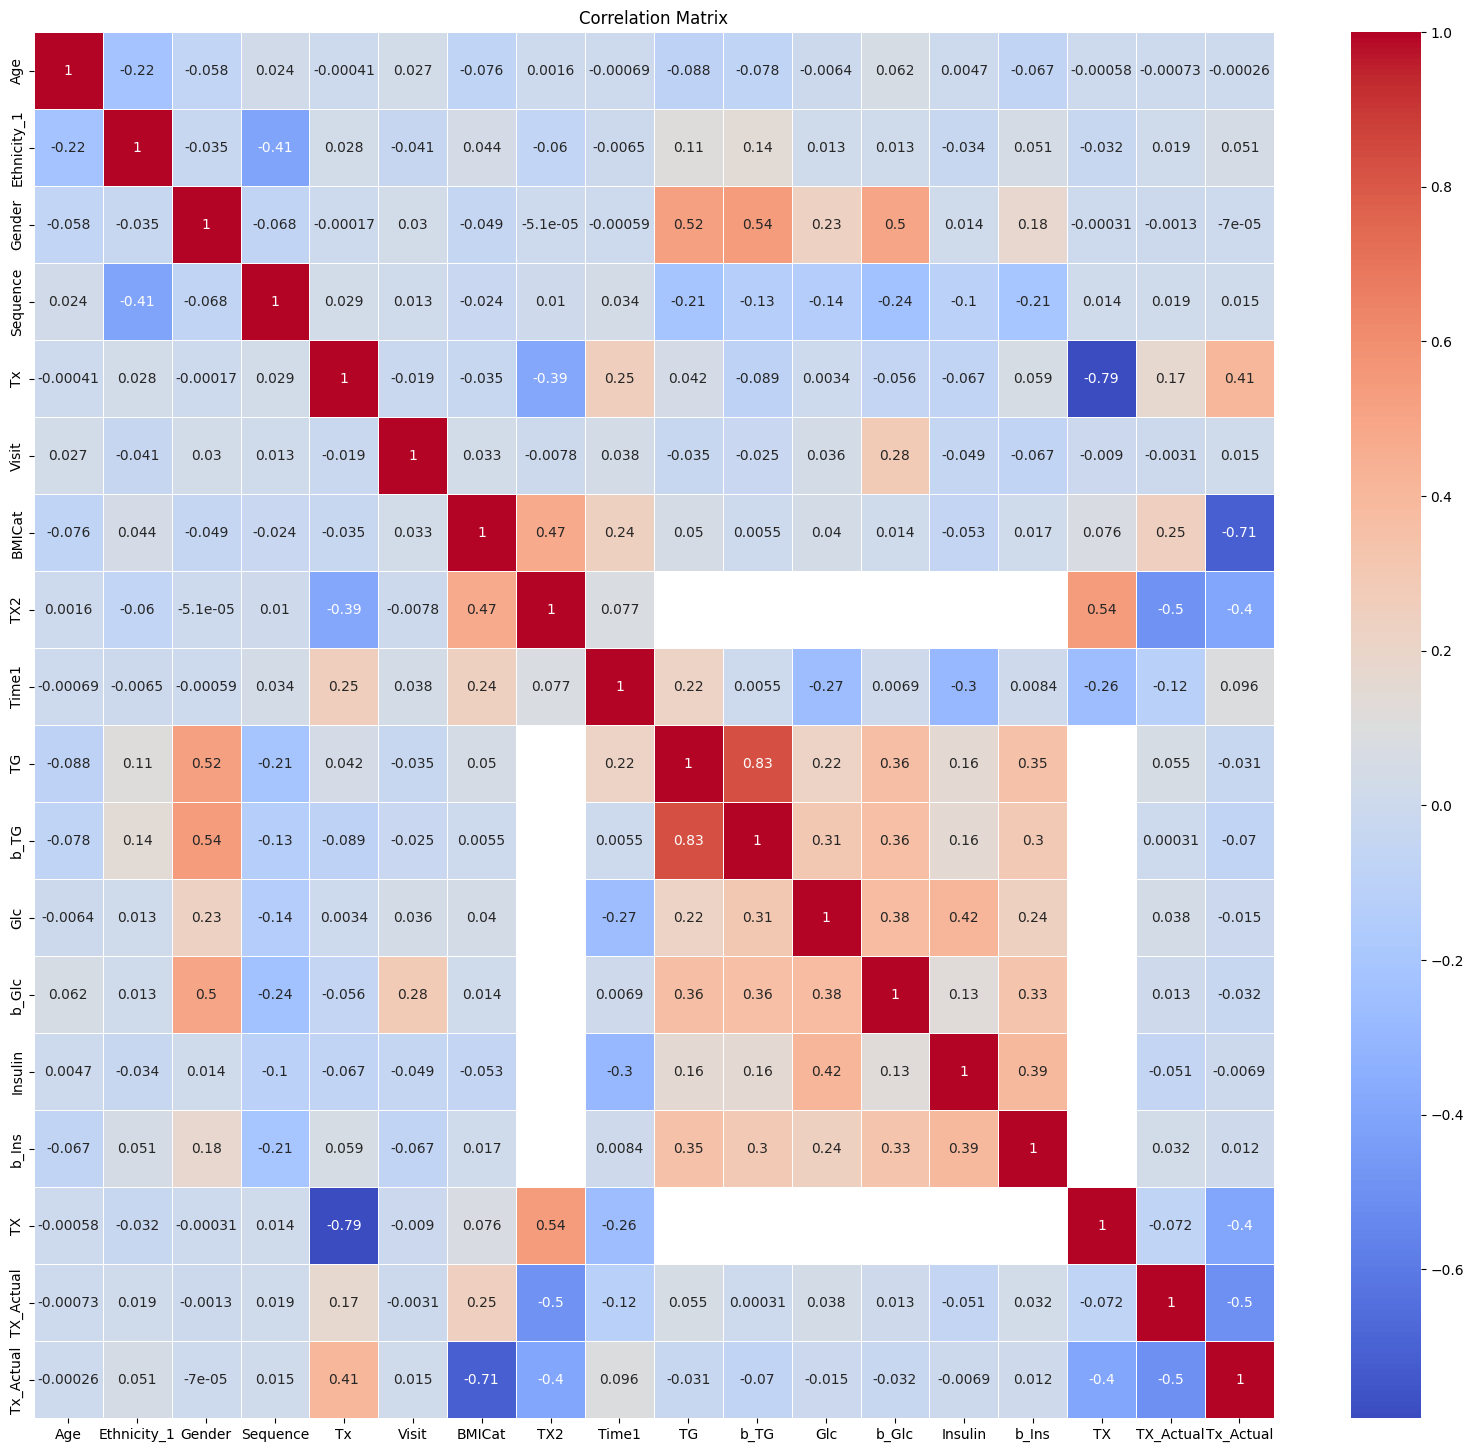

In [19]:
def calculate_spearman_correlation(df):
    # Calculate the Spearman correlation matrix
    spearman_corr_matrix = df.corr(method='spearman')
    
    return spearman_corr_matrix

spearman_corr_matrix = calculate_spearman_correlation(normalized_df)

# visualize
visualize_correlation_matrix(spearman_corr_matrix)

In [20]:
# Find strongly correlated features in spearman
strong_correlations = identify_strong_correlations(spearman_corr_matrix, threshold)
strong_correlations_df = pd.DataFrame(strong_correlations, columns=['feature1_spear','feature2_spear','correlation'])
strong_correlations_df


,feature1_spear,feature2_spear,correlation
0,Tx,TX,-0.792520
1,BMICat,Tx_Actual,-0.712986
2,TG,b_TG,0.827476


## K means clustering

In [21]:
''' temporarily removing some attributes'''
normalized_df_temp = normalized_df.drop(['TG','b_TG','Glc','b_Glc','Insulin','b_Ins'], axis=1)

In [23]:

# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# # Assuming you have a DataFrame called 'df' with your data, drop any non-numeric columns (if any).
# # If you have non-numeric columns that are informative, you might want to encode them before dropping.
# df_numeric = normalized_df_temp.select_dtypes(include=[np.number])

# # Standardize the data to have zero mean and unit variance.
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_numeric)

# # Determine the optimal number of clusters using the Elbow Method.
# # This step helps us find a good value for 'k', the number of clusters.
# inertia = []
# k_values = range(1, 11)
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df_scaled)
#     inertia.append(kmeans.inertia_)

# # Plot the Elbow curve to find the optimal 'k'.
# plt.figure(figsize=(8, 5))
# plt.plot(k_values, inertia, marker='o')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal k')
# plt.show()

# # Based on the Elbow curve, choose the appropriate value for 'k'.
# # In this example, let's assume we choose 'k=3'.
# k = 3

# # Apply K-Means clustering with the chosen 'k'.
# kmeans = KMeans(n_clusters=k, random_state=42)
# cluster_labels = kmeans.fit_predict(df_scaled)

# # Add the cluster labels to the original DataFrame.
# df_scaled['Cluster'] = cluster_labels.tolist()

# # Optionally, you can reduce the dimensionality of the data to visualize it in 2D using PCA.
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_scaled)
# df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
# df_pca['Cluster'] = cluster_labels

# # Plot the clusters in 2D using PCA.
# plt.figure(figsize=(8, 6))
# for cluster_num in range(k):
#     cluster_data = df_pca[df_pca['Cluster'] == cluster_num]
#     plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.7)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('K-Means Clustering Visualization')
# plt.legend()
# plt.show()
